In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = pd.read_csv('./data/train.csv')
# Check if the data is loaded correctly
if data.empty:
    raise ValueError("The data file is empty or not loaded correctly.")
# Display the first few rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Name is not required
* Survived is a binary categorical variable
* Pclass is a multiclass categorical
* Sex is a categorical variable
* Convert the parent and sibling present to categorical
* Embarked can be made categorical
* Find out age distribution
* First drop and then try cluster around the cabin values




In [81]:
# Remove the  name,ticket, and cabin columns
data = data.drop(columns=['Name', 'Ticket', 'Cabin'])

In [82]:

# Check for missing values in the dataset
missing_values = data.isnull().sum()
# Display the missing values
print("Missing values in each column:\n", missing_values)
# find percentage of missing values
missing_percentage = (missing_values / len(data)) * 100
# Display the percentage of missing values
print("\nPercentage of missing values in each column:\n", missing_percentage)

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Percentage of missing values in each column:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64


In [83]:
# Calculte the mean,median,mode and stadard deviation of  age coolumn
age_mean = data['Age'].mean()
age_median = data['Age'].median()
age_mode = data['Age'].mode()[0]
age_std = data['Age'].std()
# Display the statistics
print("\nStatistics of Age column:")
print(f"Mean: {age_mean}, Median: {age_median}, Mode: {age_mode}, Standard Deviation: {age_std}")


Statistics of Age column:
Mean: 29.69911764705882, Median: 28.0, Mode: 24.0, Standard Deviation: 14.526497332334042


In [84]:
# Calculate different values in Embarked column and find the most frequent value
embarked_counts = data['Embarked'].value_counts()
print("\nCounts of different values in Embarked column:\n", embarked_counts)


Counts of different values in Embarked column:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [85]:
# impute the missing age values with the mean
data['Age'].fillna(age_mean, inplace=True)


/tmp/ipykernel_212095/2450225370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(age_mean, inplace=True)


In [86]:

# Also impute the missing embarked values with the most frequent value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
# Convert the embarked column to numerical values
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

/tmp/ipykernel_212095/2418256325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [87]:
# 1. For sex column use 1 =Male and 0=female
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})



# Drop original columns if not needed
final_df = data

final_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [88]:
# check for missing values again
missing_values_final = final_df.isnull().sum()
# Display the missing values in the final DataFrame
print("\nMissing values in the final DataFrame:\n", missing_values_final)


Missing values in the final DataFrame:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [89]:
X = final_df.drop(['PassengerId', 'Survived'], axis=1)
y = final_df['Survived']

from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features (for example, k=5)
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))
feature_scores = pd.Series(selector.scores_, index=X.columns)
print(feature_scores.sort_values(ascending=False))

Selected features: ['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked']
Sex         372.405724
Pclass      115.031272
Fare         63.030764
Embarked     25.717286
Parch         5.963464
Age           4.353516
SibSp         1.110572
dtype: float64


Accuracy of Random Forest Classifier: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.76      0.71      0.73       111

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



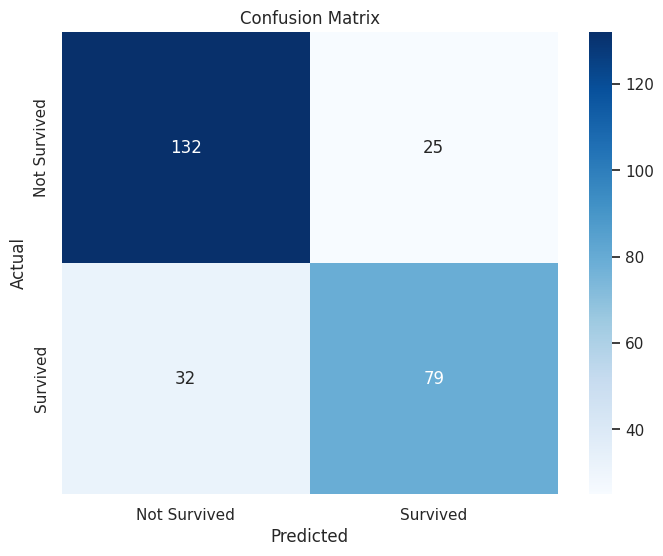

In [90]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)
# Evaluate the model on the test data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy:.2f}")
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Save the model using joblib

Accuracy of Gradient Boosting Classifier: 0.78

Classification Report for Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       157
           1       0.78      0.66      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



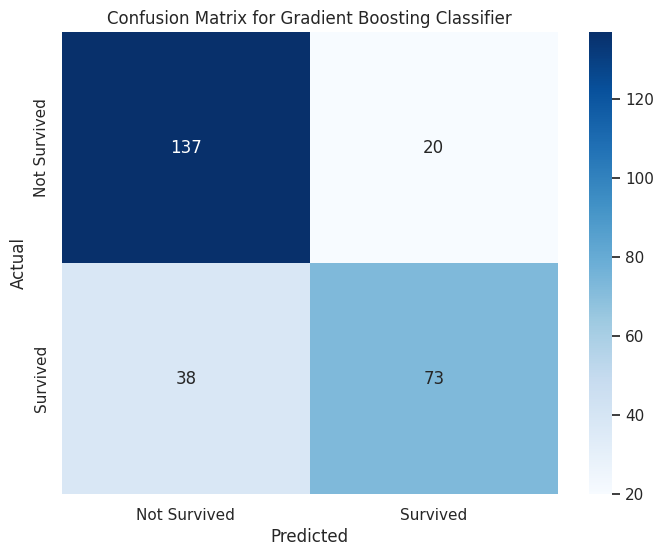

In [91]:
# let's use a different algorithm, like Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
# Fit the model on the training data
gb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)
# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of Gradient Boosting Classifier: {accuracy_gb:.2f}")
# Print classification report
print("\nClassification Report for Gradient Boosting Classifier:\n", classification_report(y_test, y_pred_gb))
# Print confusion matrix for Gradient Boosting Classifier
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [92]:
#Model Tuning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)
# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"Best parameters for Random Forest: {best_params_rf}")
print(f"Best cross-validated accuracy for Random Forest: {best_score_rf:.2f}")
# Define the parameter grid for Gradient Boosting

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validated accuracy for Random Forest: 0.82


Accuracy of Voting Classifier: 0.79

Classification Report for Voting Classifier:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       157
           1       0.79      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



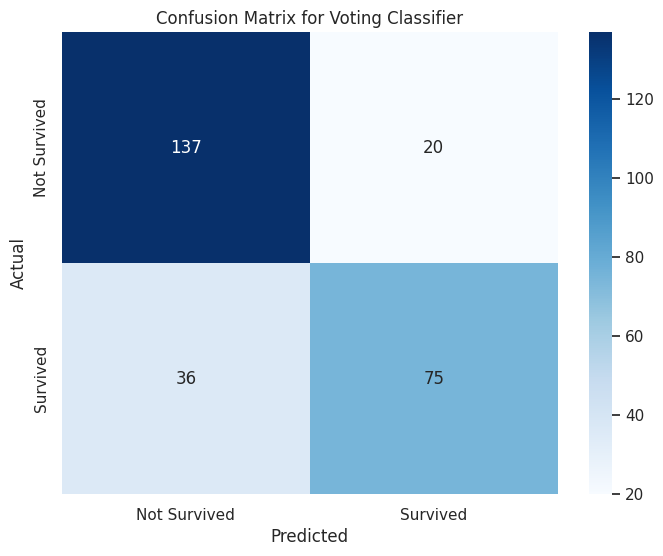

In [93]:
# Try blending RandomForest with Gradient Boosting
from sklearn.ensemble import VotingClassifier
# Create a Voting Classifier with Random Forest and Gradient Boosting
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('gb', gb_classifier)
], voting='soft')
# Fit the voting classifier on the training data
voting_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_voting = voting_classifier.predict(X_test)
# Calculate accuracy for the voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy of Voting Classifier: {accuracy_voting:.2f}")
# Print classification report for the voting classifier
print("\nClassification Report for Voting Classifier:\n", classification_report(y_test, y_pred_voting))
# Print confusion matrix for the voting classifier
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [94]:
import joblib
# Save the best model (Random Forest) using joblib
joblib.dump(rf_classifier, 'random_forest_model.pkl')
# Save the voting classifier model
joblib.dump(voting_classifier, 'voting_classifier_model.pkl')
# Load the model to verify it works
loaded_model = joblib.load('random_forest_model.pkl')
# Make predictions with the loaded model
loaded_predictions = loaded_model.predict(X_test)
# Verify the loaded model's predictions match the original predictions
assert np.array_equal(y_pred, loaded_predictions), "Loaded model predictions do not match original predictions."
# Save the final DataFrame to a CSV file
final_df.to_csv('final_titanic_data.csv', index=False)
# Display the final DataFrame
print("\nFinal DataFrame saved to 'final_titanic_data.csv'.")
# Display the first few rows of the final DataFrame
final_df.head()

/tmp/ipykernel_212095/3346140858.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(age_mean, inplace=True)
/tmp/ipykernel_212095/3346140858.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

ValueError: could not convert string to float: 'male'

In [ ]:
import joblib
# Load the test data

test_data = pd.read_csv('./data/test.csv')
# Preprocess the test data (same steps as training)
test_data = test_data.drop(columns=['Name', 'Ticket', 'Cabin'])
# Impute missing Age values with training mean (reuse age_mean from training)
test_data['Age'].fillna(age_mean, inplace=True)
# Impute missing Embarked values with training mode (reuse mode from training)
test_data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
# Encode Sex column (reuse mapping from training)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# Select the same features as used in training
X_test_final = test_data[selected_features]

# Load the trained model
loaded_model = joblib.load('random_forest_model.pkl')
# Predict Survived for the test set
survived_pred = loaded_model.predict(X_test_final)

# Prepare the output DataFrame
output_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': survived_pred
})
# Save to CSV
output_df.to_csv('titanic_predictions.csv', index=False)
print("Predictions saved to 'titanic_predictions.csv'.")
output_df.head()